In [3]:
import random as rd
import pandas as pd
import math

Variant = 12
rd.seed(Variant)

set_operations = ['-','+','*','/']
set_operands = ['a', 'b', 'c']
count_operations = rd.randint(3,5)

expression = set_operands[rd.randint(0,len(set_operands)-1)]
for i in range(count_operations):
    current_operation = set_operations[rd.randint(0,len(set_operations)-1)]
    current_operand = set_operands[rd.randint(0,len(set_operands)-1)]
    expression = "(" + expression + current_operation + current_operand + ")"
expression

'((((b*a)/a)*b)*c)'

Задание 1

In [ ]:
format ELF64

public _start

section '.bss' writable
  place db 1

section '.text' executable
print_dig:
    xor rbx, rbx     

    cmp rax, 9
    jle .single_digit       

    mov rcx, 10              
.loop:
    xor rdx, rdx            
    div rcx                
    push rdx                 
    inc rbx                  
    test rax, rax            
    jnz .loop                

.print_loop:
    pop rax                 
    add rax, '0'            
    mov [place], al         

    mov eax, 1               
    mov edi, 1             
    mov rsi, place       
    mov edx, 1             
    syscall

    dec rbx                
    jnz .print_loop         

    ret

.single_digit:
    add rax, '0'           
    mov [place], al         

    mov eax, 1         
    mov edi, 1              
    mov rsi, place          
    mov edx, 1               
    syscall
    ret

_start:
    pop rcx
    cmp rcx, 2
    jl .no_arg             

    mov rsi, [rsp + 8]     
    movzx rax, byte [rsi]  
    call print_dig          
    mov eax, 60             
    xor edi, edi           
    syscall

.no_arg:
    mov eax, 60           
    xor edi, edi            
    syscall

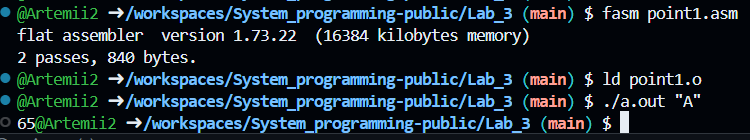

Задание 2

In [ ]:
format ELF64

public _start

section '.bss' writable
    buffer db 1

section '.text' executable

string_to_number:
    push rcx
    push rbx

    xor rax, rax
    xor rcx, rcx

.string_parse_loop:
    xor rbx, rbx
    mov bl, byte [rsi + rcx]     ; Чтение символа из строки
    cmp bl, '0'
    jl .check_conversion_end
    cmp bl, '9'
    jg .check_conversion_end

    sub bl, '0'                  ; Преобразование ASCII символа в цифру
    add rax, rbx
    mov rbx, 10
    imul rax, rbx
    inc rcx
    jmp .string_parse_loop

.check_conversion_end:
    cmp rcx, 0
    je .reset_value
    mov rbx, 10
    div rbx

.reset_value:
    pop rbx
    pop rcx
    ret

print_symbol:
    xor rbx, rbx

    cmp rax, 9
    jle .print_single_digit

    mov rcx, 10
.print_loop:
    xor rdx, rdx
    div rcx
    push rdx
    inc rbx
    test rax, rax
    jnz .print_loop

.output_loop:
    pop rax
    add rax, '0'
    mov [buffer], al

    mov eax, 1
    mov edi, 1
    mov rsi, buffer
    mov edx, 1
    syscall

    dec rbx
    jnz .output_loop

    ret

.print_single_digit:
    add rax, '0'
    mov [buffer], al

    mov eax, 1
    mov edi, 1
    mov rsi, buffer
    mov edx, 1
    syscall
    ret

_start:
    pop rcx
    cmp rcx, 4
    jne .exit_program

    mov rsi, [rsp + 8]
    call string_to_number
    mov rbx, rax

    mov rsi, [rsp + 16]
    call string_to_number
    mov rcx, rax

    mov rsi, [rsp + 24]
    call string_to_number
    mov rdx, rax

    mov rax, rbx
    imul rax, rcx
    imul rax, rcx
    imul rax, rdx
    xor rdx, rdx
    div rbx

    call print_symbol

.exit_program:
    mov eax, 60
    xor edi, edi
    syscall


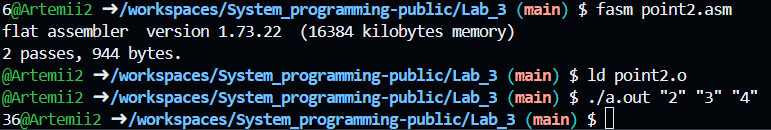

Задание 3

In [ ]:
# include <stdio.h>
# include <stdlib.h>

int main(int argc, char *argv[]) {
    int a = atoi(argv[1]);
    int b = atoi(argv[2]);
    int c = atoi(argv[3]);
    int result = ((((b*a)/a)*b)*c);
    printf("%d\n", result);
    return 0;
}

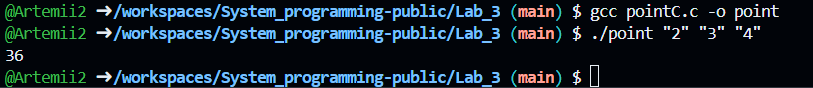